### Задание 1:
### К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k. 

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

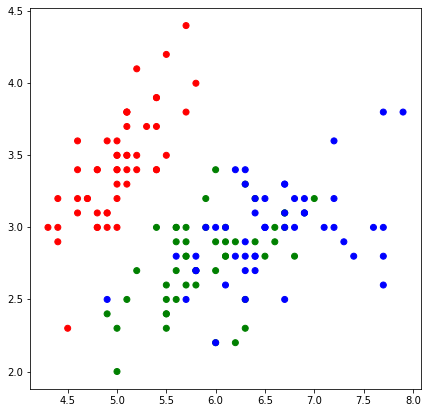

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    # Используем евклидову метрику   
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k, weighed_method = 0):
    # алгоритм поиска k ближайших соседей.
    # weighed_method:
               # 0 - не взвешено
               # 1 - q**i
               # 2 - 1/i
               # 3 - 1/(i+a)**b
               # 4 - (k+1 - i)/k
               # 5 - q**d
    answers = []

    for x in x_test:
        test_distances = []
           
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            if weighed_method == 0:   
                classes[d[1]] += 1
            if weighed_method == 1:   
                classes[d[1]] += 1/i
            if weighed_method == 2:
                q = 0.5
                classes[d[1]] += q**i
            if weighed_method == 3:
                a = 3
                b = 2
                classes[d[1]] += 1/(i+a)**b
            if weighed_method == 4:
                a = 3
                classes[d[1]] += (k + 1 - i)/k
            if weighed_method == 5:
                q = 0.75
                classes[d[1]] += q**d[0]
            i += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    # вычисление точности
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k, w):
    # график распределения классов
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 15 и w = 0: 0.833


C:\Users\79502\AppData\Local\Temp/ipykernel_1304/23847629.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


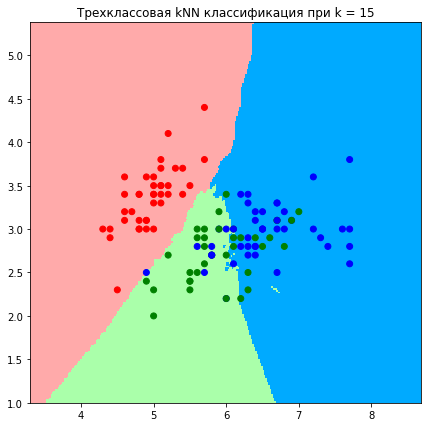

Точность алгоритма при k = 15 и w = 1: 0.767


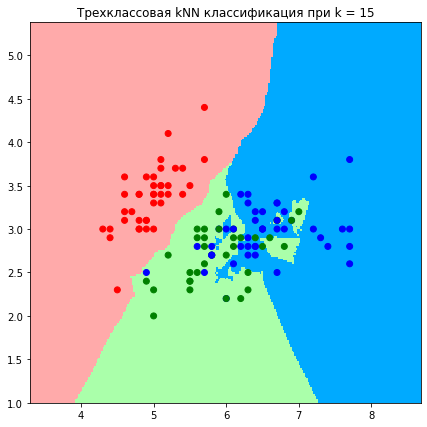

Точность алгоритма при k = 15 и w = 2: 0.667


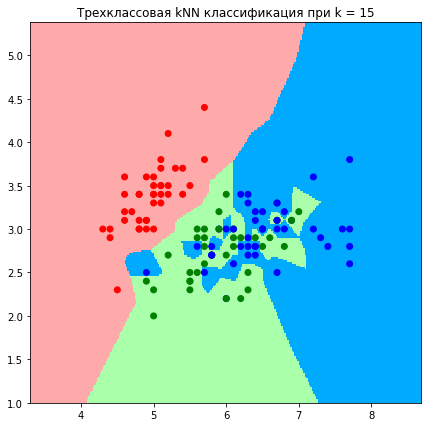

Точность алгоритма при k = 15 и w = 3: 0.767


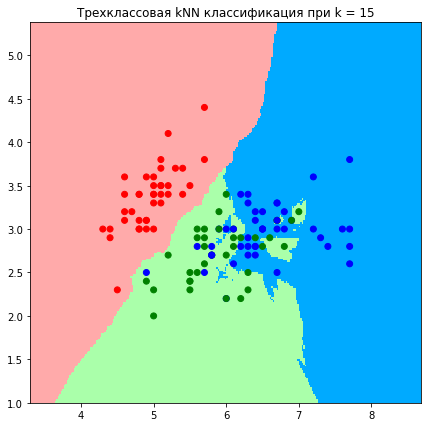

Точность алгоритма при k = 15 и w = 4: 0.867


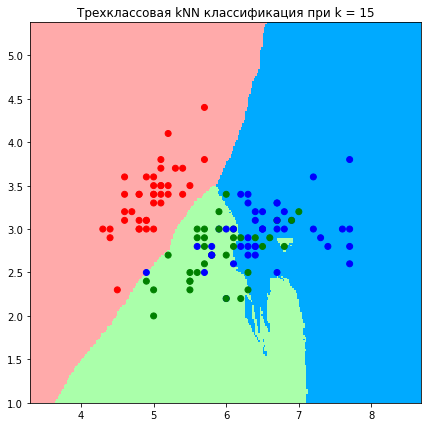

Точность алгоритма при k = 15 и w = 5: 0.833


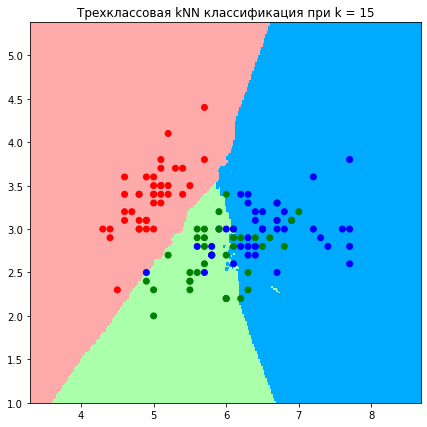

In [9]:
for w in range(6):
    k = 15
    y_pred = knn(X_train, y_train, X_test, k, weighed_method = w)
    print(f'Точность алгоритма при k = {k} и w = {w}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k, w)

### Задание 2*:
### Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [10]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, cluster_std=1.5, random_state=47)

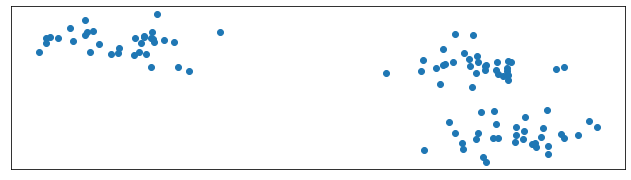

In [11]:
plt.figure(figsize=(11, 3))
plt.scatter(X[:, 0], X[:, 1])
plt.xticks([])
plt.yticks([]);

In [12]:
def kmeans(data, max_iterations, min_distance, k):

    # инициализируем центроиды. Их количество k определяется как первый элемент "порезанного" массива
    data = np.sort(data, axis=1)
    centroids = [i[0] for i in np.array_split(data, k)]
    
    for i in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
              
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        
        for ind in range(len(centroids)):
            distance = e_metrics(centroids[ind], old_centroids[ind])
            if distance > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            print('stop:', i)
            break
    
    return old_centroids, classes

In [13]:
def visualize(centroids, classes, quality_max_iterat=False):
    list_colors = ['#C0392B', '#9B59B6', '#2980B9', '#1ABC9C', '#F1C40F', 
                   '#E67E22', '#B3B6B7', '#707B7C', '#212F3D', '#156EF0',
                   '#641E16', '#512E5F', '#154360', '#0E6251', '#7D6608', 
                   '#6E2C00', '#4D5656', '#D6DBDF', '#17202A', '#D2B4DE']
    
    plt.figure(figsize=(11, 3))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    count_color=0
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=list_colors[class_item], alpha=0.8)
            plt.xticks([])
            plt.yticks([])
        count_color += 1
    if quality_max_iterat:
        plt.title(f'количество кластеров = {count_color}, '
                  f'качество = {quality_max_iterat[0]:.4f}, '
                  f'максимум итераций = {quality_max_iterat[1]}', fontweight='bold')
    else:
        plt.title(f'количество кластеров = {count_color}', fontweight='bold')
            
    plt.show()

In [14]:
def quality(centroids, clusters):
    
    result_list, k = [], len(clusters)
    
    for сluster in range(k):
        quality = 0
        
        for elem in range(len(clusters[сluster])):
            
            distances = e_metrics(clusters[сluster][elem], centroids[сluster])
            quality += distances ** 2
        result_list.append(quality / len(clusters[сluster])) 
    return np.sum(result_list) 

Определим минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм как 1e-4:

In [15]:
min_distance = 1e-4

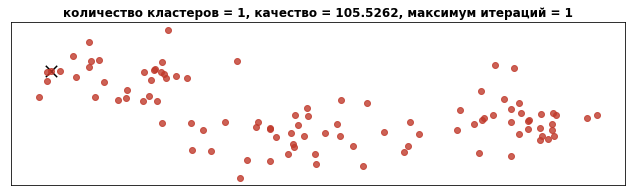

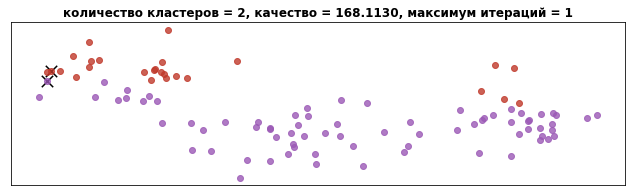

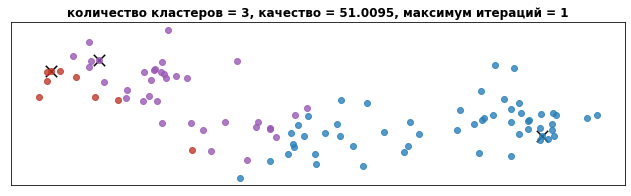

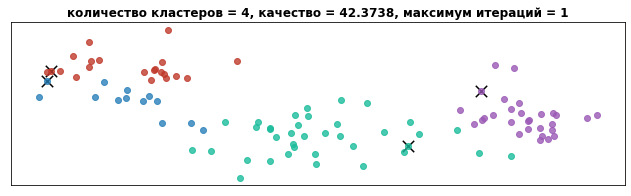

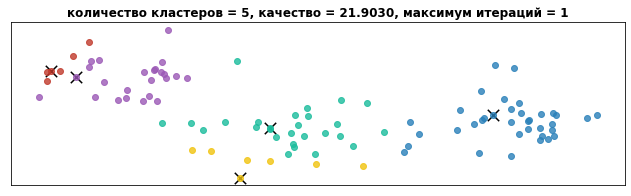

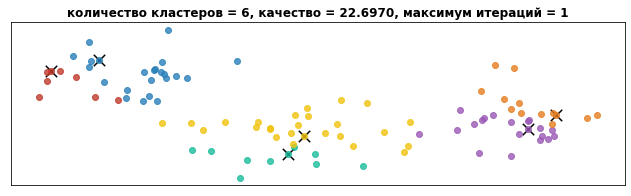

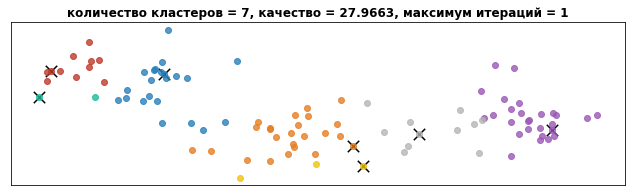

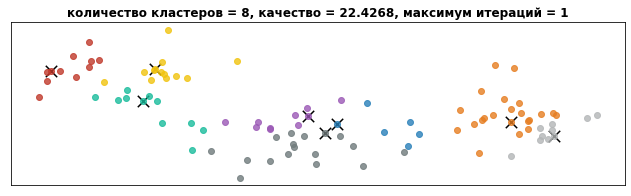

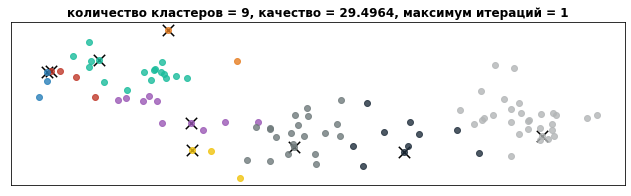

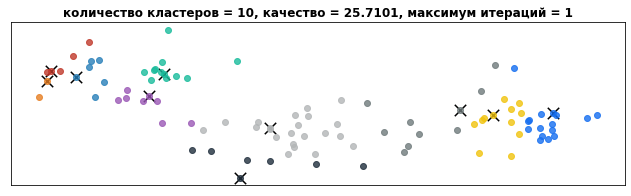

In [16]:
max_iterations = 1
quality_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(X, max_iterations, min_distance, k=i)
    q = quality(centroids, clusters)
    quality_list.append(q)
    visualize(centroids, clusters, quality_max_iterat=(q, max_iterations))

Построим график, на котором посмотрим изменение качества в завсимости от количества кластеров:

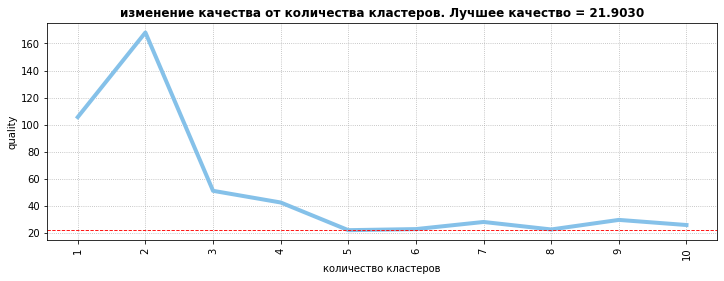

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(quality_list)+1), quality_list, c='#85C1E9', lw=4)
plt.axhline(y=min(quality_list), c='r', linestyle='--', lw=0.9)
plt.xticks(range(1, len(quality_list)+1), rotation=90)

plt.xlabel('количество кластеров')
plt.ylabel('quality')
plt.title(f'изменение качества от количества кластеров. Лучшее качество = {min(quality_list):.4f}',
          fontweight='bold')

plt.grid(linestyle=':');

Добавим возможность увеличивать количество итераций до 10-ти и построим те же графики и посчитаем то же качество:

stop: 1


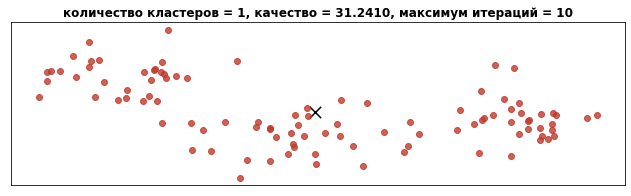

stop: 4


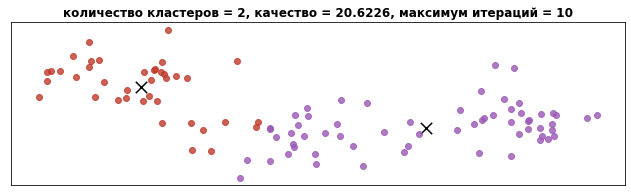

stop: 7


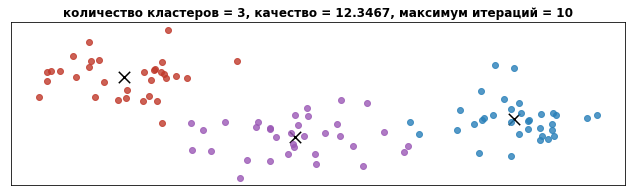

stop: 4


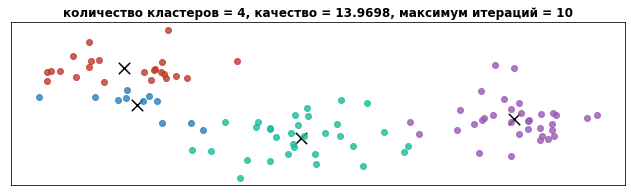

stop: 9


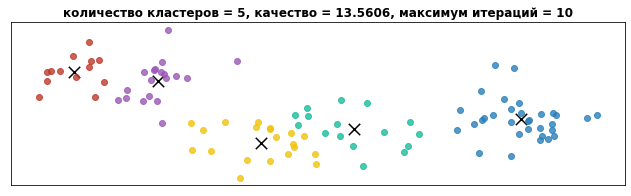

stop: 4


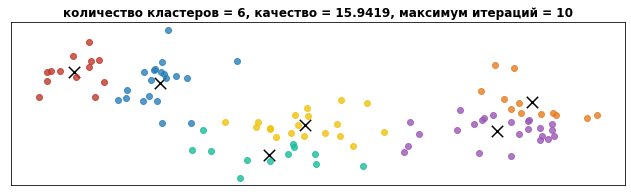

stop: 5


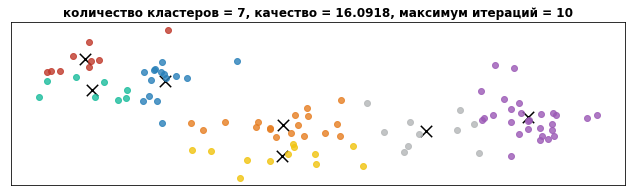

stop: 4


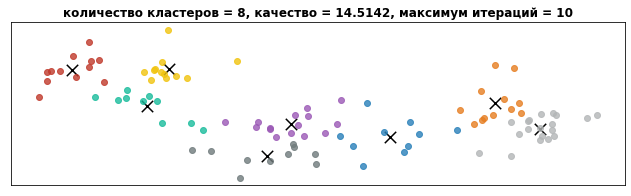

stop: 3


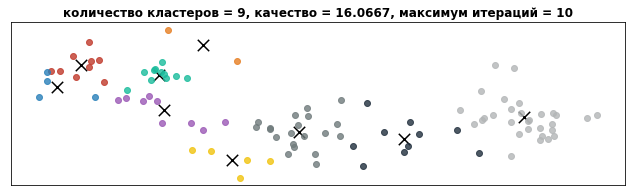

stop: 6


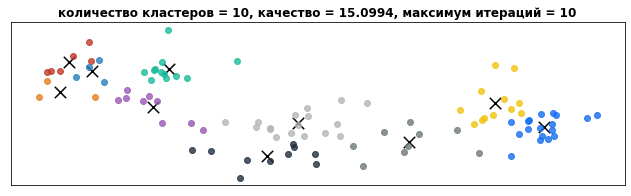

In [18]:
max_iterations = 10
quality_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(X, max_iterations, min_distance, k=i)
    q = quality(centroids, clusters)
    quality_list.append(q)
    visualize(centroids, clusters, quality_max_iterat=(q, max_iterations))

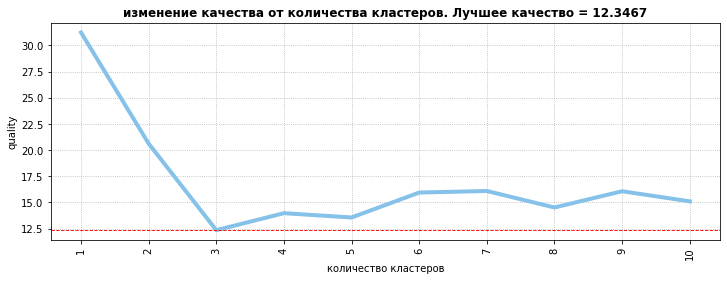

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(quality_list)+1), quality_list, c='#85C1E9', lw=4)
plt.axhline(y=min(quality_list), c='r', linestyle='--', lw=0.9)
plt.xticks(range(1, len(quality_list)+1), rotation=90)

plt.xlabel('количество кластеров')
plt.ylabel('quality')
plt.title(f'изменение качества от количества кластеров. Лучшее качество = {min(quality_list):.4f}',
          fontweight='bold')

plt.grid(linestyle=':');

Вывод: алгоритм K-means показывает лучшее качество кластеризации и ведёт себя более предсказуемо при возможности добавления количества итераций c пересчётом центроид. При таком подходе лучшее качество составило 12.35 на трёх кластерах после 7-ми итераций.

K-means без возможности итераций на тех же данных показал лучшее качество = 21.90 при пяти кластерах.

В обоих случаях графики довольно быстро достигли "локтя", после которого качество перестало существенно меняться, но с возможностью добавления итераций это произошло быстрее.